### Crime Dataset preperation to Calculate Crime Rate

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets


# reading csv file
dataset = pd.read_csv("01_District_wise_crimes_committed_IPC_2001_2012.csv")
dataset.head()

pop_ds = pd.read_csv("India Population Growth by Census data.csv")

In [2]:
pop_ds

STATE          DISTRICT     2011     2001  \
0       ANDHRA PRADESH          ADILABAD  2741239  2488003   
1        UTTAR PRADESH              AGRA  4418797  3620436   
2              GUJARAT         AHMADABAD  7214225  5816519   
3          MAHARASHTRA        AHMADNAGAR  4543159  4040642   
4              MIZORAM            AIZAWL   400309   325676   
5            RAJASTHAN             AJMER  2583052  2181670   
6          MAHARASHTRA             AKOLA  1813906  1630239   
7               KERALA          ALAPUZHA  2127789  2109160   
8        UTTAR PRADESH           ALIGARH  3673889  2992286   
9       MADHYA PRADESH         ALIRAJPUR   728999  2992286   
10       UTTAR PRADESH         ALLAHABAD  5954391  4936105   
11         UTTARAKHAND            ALMORA   622506   630567   
12           RAJASTHAN             ALWAR  3674179  2992592   
13             HARYANA            AMBALA  1128350  1014411   
14       UTTAR PRADESH    AMBEDKAR NAGAR  2397888  2026876   
15         MAHARASHTRA          AMRAVATI  2888445  2607160   
16             GUJARAT            AMRELI  1514190  1393918   
17              PUNJAB          AMRITSAR  2490656  3096077   
18             GUJARAT             ANAND  2092745  1856872   
19      ANDHRA PRADESH         ANANTAPUR  4081148  3640478   
20   JAMMU AND KASHMIR          ANANTNAG  1078692  1172434   
21   ARUNACHAL PRADESH             ANJAW    21167   314084   
22               BIHAR            ARARIA  2811569  2158608   
23          TAMIL NADU          ARIYALUR   754894   695524   
24               BIHAR             ARWAL   700843   695524   
25      MADHYA PRADESH        ASHOKNAGAR   845071   695524   
26       UTTAR PRADESH           AURAIYA  1379545  1179993   
27               BIHAR        AURANGABAD  2540073  2897013   
28         MAHARASHTRA        AURANGABAD  3701282  2897013   
29       UTTAR PRADESH          AZAMGARH  4613913  3939916   
..                 ...               ...      ...      ...   
604          KARNATAKA     UTTAR KANNADA  1437169  1353644   
605        UTTARAKHAND        UTTARKASHI   330086   295013   
606            GUJARAT          VADODARA  4165626  3641802   
607              BIHAR          VAISHALI  3495021  2718421   
608            GUJARAT            VALSAD  1705678  1410553   
609      UTTAR PRADESH          VARANASI  3676841  3138671   
610         TAMIL NADU           VELLORE  3936331  3477317   
611     MADHYA PRADESH           VIDISHA  1458875  1214857   
612         TAMIL NADU        VILUPPURAM  3458873  2960373   
613         TAMIL NADU      VIRUDHUNAGAR  1942288  1751301   
614     ANDHRA PRADESH     VISAKHAPATNAM  4290589  3832336   
615     ANDHRA PRADESH      VIZIANAGARAM  2344474  2249254   
616     ANDHRA PRADESH          WARANGAL  3512576  3246004   
617        MAHARASHTRA            WARDHA  1300774  1236736   
618        MAHARASHTRA            WASHIM  1197160  1020216   
619             KERALA          WAYANADU   817420   780619   
620       NCT OF DELHI              WEST  2543243  2128908   
621             SIKKIM              WEST   136435   123256   
622          MEGHALAYA   WEST GARO HILLS   643291   518390   
623     ANDHRA PRADESH     WEST GODAVARI  3936966  3803517   
624  ARUNACHAL PRADESH       WEST KAMENG    83947   123256   
625          MEGHALAYA  WEST KHASI HILLS   383461   296049   
626  ARUNACHAL PRADESH        WEST SIANG   112274   123256   
627            TRIPURA              WEST  1725739  1532982   
628           NAGALAND             WOKHA   166343   161223   
629          KARNATAKA           YADGIRI  1174271  3130922   
630            HARYANA       YAMUNANAGAR  1214205  1041630   
631        PONDICHERRY             YANAM    55626    31394   
632        MAHARASHTRA          YAVATMAL  2772348  2458271   
633           NAGALAND         ZUNHEBOTO   140757   153955   

     % Change in population  % increase per year     2002     2003     2004  \
0                     10.18             1.017828  2513327  2538908  2564750   
1             

In [3]:
#removing column which has total of other two columns
# for example. Theft = AUTO Theft + Total Theft, thus removing Theft column

ds_crime = dataset.drop(['RAPE','THEFT','KIDNAPPING AND ABDUCTION'],axis=1)
for x in ds_crime.columns:
    print(str(x)+", ")   

STATE, 
DISTRICT, 
YEAR, 
MURDER, 
ATTEMPT TO MURDER, 
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER, 
CUSTODIAL RAPE, 
OTHER RAPE, 
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS, 
KIDNAPPING AND ABDUCTION OF OTHERS, 
DACOITY, 
PREPARATION AND ASSEMBLY FOR DACOITY, 
ROBBERY, 
BURGLARY, 
AUTO THEFT, 
OTHER THEFT, 
RIOTS, 
CRIMINAL BREACH OF TRUST, 
CHEATING, 
COUNTERFIETING, 
ARSON, 
HURT/GREVIOUS HURT, 
DOWRY DEATHS, 
ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY, 
INSULT TO MODESTY OF WOMEN, 
CRUELTY BY HUSBAND OR HIS RELATIVES, 
IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES, 
CAUSING DEATH BY NEGLIGENCE, 
OTHER IPC CRIMES, 
TOTAL IPC CRIMES, 


In [4]:
# years = [2001]#,2002,2003]
# ds_crime = ds_crime[ds_crime['YEAR'].isin(years)]

In [5]:
np.unique(ds_crime['YEAR'])

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012])

#### Basic Preprocessing of Dataset

In [6]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()

# # Label encoding  for STATE/UT and DISTRICT
# le.fit(ds_crime['STATE/UT'])

# ds_crime.iloc[:,0] = le.fit_transform(ds_crime['STATE/UT']) 

# le.fit(ds_crime['DISTRICT'])

# ds_crime.iloc[:,1] = le.fit_transform(ds_crime['DISTRICT']) 

In [7]:
ds_state = list(ds_crime.groupby('STATE').groups.keys())
pop_state = np.unique(pop_ds['STATE'])
print(f"ds_state : {np.size(ds_state)} pop_state: {np.size(pop_state)}")
print(type(ds_state))
print(type(pop_state))
d = {'ds_state': ds_state, 'pop_state': pop_state}
df = pd.DataFrame(data=d)
np.size(df.loc[(df['ds_state'] != df['pop_state'])])

ds_state : 35 pop_state: 35
<class 'list'>
<class 'numpy.ndarray'>


0

In [8]:
ds_gpstate = ds_crime.groupby('STATE')
pop_gpstate = pop_ds.groupby('STATE')
ds_gpstate.groups.keys()
# ['ANDAMAN AND NICOBAR ISLANDS', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR', 'CHANDIGARH', 
#  'CHHATTISGARH', 'DADRA AND NAGAR HAVELI', 'DAMAN AND DIU', 'GOA', 'GUJARAT', 'HARYANA',
#  'HIMACHAL PRADESH', 'JAMMU AND KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'LAKSHADWEEP',
#  'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'NCT OF DELHI',
#  'ORISSA', 'PONDICHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 
#  'UTTARAKHAND', 'WEST BENGAL']

dict_keys(['ANDAMAN AND NICOBAR ISLANDS', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR', 'CHANDIGARH', 'CHHATTISGARH', 'DADRA AND NAGAR HAVELI', 'DAMAN AND DIU', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH', 'JAMMU AND KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'NCT OF DELHI', 'ORISSA', 'PONDICHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL'])

In [9]:
# for m in ds_gpstate.groups.keys():    
#     ds_dist = np.unique(ds_gpstate.get_group(m)['DISTRICT'])
#     pop_dist = np.unique(pop_gpstate.get_group(m)['District name'])
#     print("------------------\n")
#     print(ds_dist)
#     print(pop_dist)
#     print("\n------------------\n")

# for m in ds_gpstate.groups.keys(): 
m = 'WEST BENGAL'
ds_dist = np.unique(ds_gpstate.get_group(m)['DISTRICT'])
pop_dist = np.unique(pop_gpstate.get_group(m)['DISTRICT'])
print(f"START--------------------{m}------------------\n")
print(ds_dist)
print("\n")
print(pop_dist)
print("\n------------------\n")
uninon = np.union1d(ds_dist,pop_dist)
intersection = np.intersect1d(ds_dist,pop_dist)
fltr = np.setdiff1d(uninon,intersection)
ds_dist =  np.intersect1d(ds_dist,fltr)
pop_dist =  np.intersect1d(pop_dist,fltr)  
print(f"ds: {ds_dist}\n\n pop : {pop_dist}")#{fltr}
print(f"END--------------------{m}------------------\n")

START--------------------WEST BENGAL------------------

['ASANSOL' 'BANKURA' 'BARDDHAMAN' 'BIRBHUM' 'COOCHBEHAR'
 'DAKSHIN DINAJPUR' 'DARJILING' 'HAORA' 'HAORA DIMA HASAO' 'HUGLI'
 'JALPAIGURI' 'JHARGRAM' 'KHARAGPUR DIMA HASAO' 'KOCH BIHAR' 'KOLKATA'
 'MALDAH' 'MURSHIDABAD' 'NADIA' 'NORTH TWENTY FOUR PARGANAS'
 'PASCHIM MEDINIPUR' 'PURAB PURBA MEDINIPUR' 'PURBA MEDINIPUR' 'PURULIYA'
 'SEALDAH DIMA HASAO' 'SILIGURI DIMA HASAO' 'SILIGURI_PC' 'UTTAR DINAJPUR']


['BANKURA' 'BARDDHAMAN' 'BIRBHUM' 'DAKSHIN DINAJPUR' 'DARJILING' 'HAORA'
 'HUGLI' 'JALPAIGURI' 'KOCH BIHAR' 'KOLKATA' 'MALDAH' 'MURSHIDABAD'
 'NADIA' 'NORTH TWENTY FOUR PARGANAS' 'PASCHIM MEDINIPUR'
 'PURBA MEDINIPUR' 'PURULIYA' 'SOUTH TWENTY FOUR PARGANAS'
 'UTTAR DINAJPUR']

------------------

ds: ['ASANSOL' 'COOCHBEHAR' 'HAORA DIMA HASAO' 'JHARGRAM'
 'KHARAGPUR DIMA HASAO' 'PURAB PURBA MEDINIPUR' 'SEALDAH DIMA HASAO'
 'SILIGURI DIMA HASAO' 'SILIGURI_PC']

 pop : ['SOUTH TWENTY FOUR PARGANAS']
END--------------------WEST BENGAL

In [10]:
# pop_tran = pd.melt(pop_ds, id_vars=["State", "District"], var_name="Date", value_name="Value")
# pop_tran.to_excel("Population_transpose.xlsx")
pop_tran = pd.read_excel("Population_transpose.xlsx")

In [11]:
# final_data = pd.merge(ds_crime,pop_tran,how='left',on=['STATE','DISTRICT','YEAR'])
# final_data.to_excel("final_dataset.xlsx")
crime_dataset = pd.read_excel("final_dataset.xlsx")
crime_dataset.columns.values

array(['STATE', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS',
       'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN',
       'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES',
       'TOTAL IPC CRIMES', 'POPULATION'], dtype=object)

In [12]:
#crime rate
crime_dataset["CRIME RATE"] = (crime_dataset['TOTAL IPC CRIMES'] / crime_dataset['POPULATION']) * 100000

In [13]:
crime_dataset = crime_dataset.dropna()
crime_dataset.describe()
crime_dataset

STATE                     DISTRICT  YEAR  MURDER  \
0                  ANDHRA PRADESH                     ADILABAD  2001     101   
1                  ANDHRA PRADESH                    ANANTAPUR  2001     151   
2                  ANDHRA PRADESH                     CHITTOOR  2001     101   
6                  ANDHRA PRADESH                       GUNTUR  2001     182   
7                  ANDHRA PRADESH                    HYDERABAD  2001     111   
8                  ANDHRA PRADESH                   KARIMNAGAR  2001     162   
9                  ANDHRA PRADESH                      KHAMMAM  2001      93   
10                 ANDHRA PRADESH                      KRISHNA  2001      65   
11                 ANDHRA PRADESH                      KURNOOL  2001     133   
12                 ANDHRA PRADESH                  MAHBUBNAGAR  2001     157   
13                 ANDHRA PRADESH                        MEDAK  2001     101   
14                 ANDHRA PRADESH                     NALGONDA  2001     122   
15                 ANDHRA PRADESH  SRI POTTI SRIRAMULU NELLORE  2001      89   
16                 ANDHRA PRADESH                    NIZAMABAD  2001     106   
17                 ANDHRA PRADESH                     PRAKASAM  2001     102   
18                 ANDHRA PRADESH                   RANGAREDDY  2001     214   
20                 ANDHRA PRADESH                   SRIKAKULAM  2001      38   
23                 ANDHRA PRADESH                VISAKHAPATNAM  2001      58   
24                 ANDHRA PRADESH                VISAKHAPATNAM  2001      22   
25                 ANDHRA PRADESH                 VIZIANAGARAM  2001      33   
26                 ANDHRA PRADESH                     WARANGAL  2001     158   
27                 ANDHRA PRADESH                WEST GODAVARI  2001      77   
28              ARUNACHAL PRADESH                    CHANGLANG  2001      11   
29              ARUNACHAL PRADESH                DIBANG VALLEY  2001       3   
30              ARUNACHAL PRADESH                  EAST KAMENG  2001       3   
31              ARUNACHAL PRADESH                  WEST KAMENG  2001       4   
32              ARUNACHAL PRADESH                        LOHIT  2001      16   
33              ARUNACHAL PRADESH                   PAPUM PARE  2001      11   
34              ARUNACHAL PRADESH                   EAST SIANG  2001       7   
35              ARUNACHAL PRADESH                  UPPER SIANG  2001       1   
...                           ...                          ...   ...     ...   
7810                  WEST BENGAL                        HAORA  2011      39   
7811                  WEST BENGAL                        HAORA  2011      38   
7813                  WEST BENGAL                   JALPAIGURI  2011     108   
7815                  WEST BENGAL                      KOLKATA  2011      54   
7816                  WEST BENGAL                       MALDAH  2011      98   
7817                  WEST BENGAL                  MURSHIDABAD  2011     145   
7818                  WEST BENGAL                        NADIA  2011     136   
7819                  WEST BENGAL            PASCHIM MEDINIPUR  2011     171   
7821                  WEST BENGAL                     PURULIYA  2011      93   
7824                  WEST BENGAL               UTTAR DINAJPUR  2011      66   
7825  ANDAMAN AND NICOBAR ISLANDS                      ANDAMAN  2011      14   
7826  ANDAMAN AND NICOBAR ISLANDS                      NICOBAR  2011       0   
7827                   CHANDIGARH                   CHANDIGARH  2011      24   
7828       DADRA AND NAGAR HAVELI       DADRA AND NAGAR HAVELI  2011      14   
7829                DAMAN AND DIU                        DAMAN  2011       6   
7830                DAMAN AND DIU                          DIU  2011       0   
7832                 NCT OF DELHI                      CENTRAL  2011      25   
7834                 NCT OF DELHI                    NEW DELHI  2011     543   
7835                 NCT OF 

/home/srishtee/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


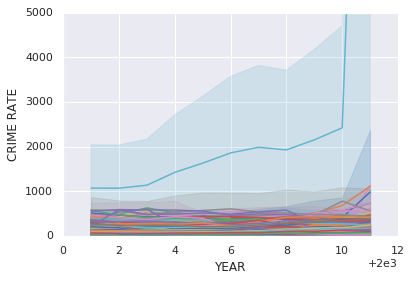

In [14]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()
# plt.figure(figsize=(20,20))
groupby_state_dist_year = crime_dataset.groupby(by=['STATE','DISTRICT'])
# groupby_state_dist_year.get_group().
for (m,v) in groupby_state_dist_year:
#     print(m)    
    sns.lineplot(x="YEAR", y="CRIME RATE", data=v)
#     sns.distplot(v['CRIME RATE'])
#     plt.xlim(-10,600)
    plt.ylim(0,5000)
#     break

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Label encoding  for STATE/UT and DISTRICT
le.fit(crime_dataset['STATE'])

crime_dataset.iloc[:,0] = le.fit_transform(crime_dataset['STATE']) 

le.fit(crime_dataset['DISTRICT'])

crime_dataset.iloc[:,1] = le.fit_transform(crime_dataset['DISTRICT']) 


In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scalar = MinMaxScaler()
# crime_dataset = pd.DataFrame(scalar.fit_transform(crime_dataset))
# groupby_state_dist_year = crime_dataset.groupby(by=['STATE','DISTRICT'])

state_city_norm_df = []
i = 0
for (m,v) in groupby_state_dist_year:
#     print(v.iloc[:,2:])    
    normalized_crime  = scalar.fit_transform(v.iloc[:,-1:])
    v["STATE DIST NORM"] =   normalized_crime
    state_city_norm_df.append(v)

state_city_norm_df = pd.concat(state_city_norm_df)

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [17]:
state_city_norm_df.describe()

STATE    DISTRICT         YEAR      MURDER  ATTEMPT TO MURDER  \
count  7133.000000  7133.00000  7133.000000  7133.00000        7133.000000   
mean     18.382728   300.52152  2006.075284    49.71036          42.980934   
std      10.184963   174.88490     3.167075    47.83894          53.046532   
min       0.000000     0.00000  2001.000000     0.00000           0.000000   
25%      11.000000   148.00000  2003.000000    20.00000          12.000000   
50%      18.000000   302.00000  2006.000000    38.00000          28.000000   
75%      28.000000   449.00000  2009.000000    65.00000          55.000000   
max      34.000000   600.00000  2011.000000   565.00000         682.000000   

       CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  CUSTODIAL RAPE   OTHER RAPE  \
count                                7133.000000     7133.000000  7133.000000   
mean                                    5.509603        0.003365    29.308285   
std                                    10.684670        0.085322    36.837293   
min                                     0.000000        0.000000     0.000000   
25%                                     0.000000        0.000000     8.000000   
50%                                     2.000000        0.000000    20.000000   
75%                                     6.000000        0.000000    39.000000   
max                                   241.000000        5.000000   658.000000   

       KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
count                                  7133.000000   
mean                                     31.647413   
std                                      63.468758   
min                                       0.000000   
25%                                       6.000000   
50%                                      17.000000   
75%                                      38.000000   
max                                    2085.000000   

       KIDNAPPING AND ABDUCTION OF OTHERS       ...         \
count                         7133.000000       ...          
mean                            12.221926       ...          
std                             39.049668       ...          
min                              0.000000       ...          
25%                              2.000000       ...          
50%                              5.000000       ...          
75%                             12.000000       ...          
max                           1682.000000       ...          

       ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
count                                        7133.000000     
mean                                           55.500771     
std                                            68.887713     
min                                             0.000000     
25%                                            11.000000     
50%                                            32.000000     
75%                                            74.000000     
max                                           868.000000     

       INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
count                 7133.000000                          7133.000000   
mean                    14.911117                           102.895275   
std                     40.943951                           180.609706   
min                      0.000000                             0.000000   
25%                      0.000000                            13.000000   
50%                      2.000000                            49.000000   
75%                     13.000000                           128.000000   
max                   1122.000000                          3035.000000   

       IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  \
count                                  7133.000000   
mean                                      0.113136   
std                                       1.548872   
min                                       0.000000   
25%                                   

In [ ]:
mean_of_crimerate = state_city_norm_df["STATE_DIST_NORM"].mean()
state_city_norm_df["VIOLENCE RATING"] = np.where(state_city_norm_df['STATE_DIST_NORM'] < mean_of_crimerate, 0, 1)
state_city_norm_df.to_excel("final_dataset.xlsx")